## Computing Graph Laplacian Matrix

In [37]:
import networkx as nx
import numpy as np

Let's generate `G`, a random **regular** graph, for the purposes of this tutorial.

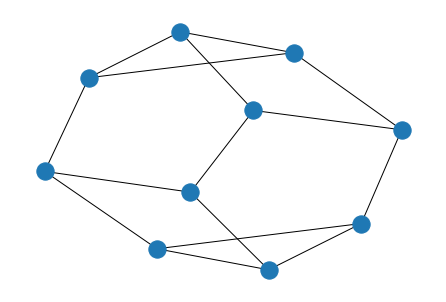

In [38]:
G = nx.random_regular_graph(3, 10)
nx.draw(G)

We can now compute the Laplacian matrix, `L`, using the formula: $L = D - A$.

* `D` = the degree matrix of `G`
* `A` = the adjacency matrix of `G`

In [39]:
# note: toarray() converts from sparse array -> dense numpy array
A = nx.adjacency_matrix(G).toarray() 
D = np.diag(np.ones(10) * 3)
L = D - A

L

array([[ 3., -1.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
       [-1.,  3.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  3., -1., -1.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0., -1.,  3.,  0.,  0., -1., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  3.,  0.,  0.,  0., -1., -1.],
       [-1., -1.,  0.,  0.,  0.,  3., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0., -1.,  3.,  0., -1.,  0.],
       [-1.,  0.,  0., -1.,  0.,  0.,  0.,  3.,  0., -1.],
       [ 0., -1.,  0.,  0., -1.,  0., -1.,  0.,  3.,  0.],
       [ 0.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,  3.]])

We can use `networkx` to compute the Laplacian directly.

In [40]:
L = nx.laplacian_matrix(G).toarray()
L

array([[ 3, -1,  0,  0,  0, -1,  0, -1,  0,  0],
       [-1,  3,  0,  0,  0, -1,  0,  0, -1,  0],
       [ 0,  0,  3, -1, -1,  0,  0,  0,  0, -1],
       [ 0,  0, -1,  3,  0,  0, -1, -1,  0,  0],
       [ 0,  0, -1,  0,  3,  0,  0,  0, -1, -1],
       [-1, -1,  0,  0,  0,  3, -1,  0,  0,  0],
       [ 0,  0,  0, -1,  0, -1,  3,  0, -1,  0],
       [-1,  0,  0, -1,  0,  0,  0,  3,  0, -1],
       [ 0, -1,  0,  0, -1,  0, -1,  0,  3,  0],
       [ 0,  0, -1,  0, -1,  0,  0, -1,  0,  3]], dtype=int64)

We can verify that this matrix is equal to our more manual method with the `np.array_equal(array1, array2)` method.

In [41]:
np.array_equal(nx.laplacian_matrix(G).toarray(), D - A)

True

## Properties of the Laplacian Matrix

We will now look at some properties of the Laplacian matrix `L`, with reference to [this Wikipedia section](https://en.wikipedia.org/wiki/Laplacian_matrix#Properties).

### `L` is symmetric.

In [42]:
np.array_equal(L, L.T)

True

### `L` is positive-semidefinite

In [43]:
# generate eigenvalues and eigenvectors of L
evals, evecs = np.linalg.eig(L)

# evaluate if all are zero or above
print(f"All above zero? {np.all(evals >= 0)}")

# print the (sorted) eigenvalues, smallest to largest
sorted(evals)

All above zero? True


[1.1102230246251565e-16,
 0.8533505224209754,
 1.7168657967226006,
 2.0000000000000013,
 2.999999999999999,
 3.3683097540676616,
 3.9999999999999987,
 4.60528112969625,
 5.0000000000000036,
 5.456192797092516]

### Every row sum and column sum of `L` is zero.

In [44]:
L.sum(axis=0), L.sum(axis=1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

### `L` is singular.

In [47]:
# Taking the inverse will give LinAlgError
np.linalg.inv(L)

LinAlgError: ignored

In [49]:
# The determinant = 0 and the condition-number is very large (ill conditioned)
print("Determinant: ", np.linalg.det(L))
print("Condition Number: ", np.linalg.cond(L))

Determinant:  0.0
Condition Number:  1.097139225382659e+17


### The second smallest eigenvalue of `L` is the algebraic connectivity (or Fiedler value) of `G`

In [50]:
print(nx.algebraic_connectivity(G))
print(sorted(evals)[1])

0.8533505224209766
0.8533505224209754


### The trace of `L` is equal to `2m` where `m` is the number of edges of the considered graph.

In [46]:
np.trace(L) == 2 * len(G.edges())

True